# SVM 類別中的 fit() 函式是如何運作的。

fit() 函式是 SVM 模型的核心訓練部分，它的主要目標是找到最佳的權重向量 w 和偏置項 b，以便將不同類別的資料點分開。

## 以下是其運作原理的步驟：
- 初始化權重和偏置：
函式開始時，會根據輸入資料 X 的特徵數量初始化權重向量 w 為一個全零的向量。
偏置項 b 也被初始化為 0。

- 迭代訓練：
fit() 函式會進行多次迭代（由 self.n_iters 控制），在每次迭代中遍歷所有的訓練樣本。
對於每一個訓練樣本 x_i 及其對應的標籤 y_[idx]，函式會檢查一個條件：y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1。

- 更新權重和偏置：
這個條件判斷的是當前樣本是否已經被正確分類並且距離決策邊界足夠遠（即在或超出邊界）。

如果條件成立 (樣本已正確分類且距離邊界足夠遠)：此時只需要對權重 w 進行正則化處理，防止權重過大。更新公式為：self.w -= self.lr * (2 * self.lambda_param * self.w)。這裡的 self.lr 是學習率，self.lambda_param 是正則化參數。

如果條件不成立 (樣本未正確分類或距離邊界太近)：這表示當前的權重和偏置不足以正確分類這個樣本，需要進行調整。
更新公式為：
權重 w 的更新：self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))

偏置 b 的更新：self.b -= self.lr * y_[idx]
這個更新包含了正則化項以及根據當前樣本的特徵和標籤來調整 w 和 b 的部分。

- 重複迭代：
這個過程會重複進行，直到達到指定的迭代次數 self.n_iters。在每次迭代和每個樣本的更新中，模型都會嘗試微調 w 和 b，使其能夠更好地將不同類別的樣本分開，並最大化類別之間的邊界。

- 總結來說，fit() 函式通過迭代地檢查每個樣本的分類情況，並根據是否正確分類以及與決策邊界的距離來調整權重 w 和偏置 b，最終找到一個能夠有效區分不同類別的超平面。

準確率: 100.00%
權重 w: [ 0.62325698 -0.10498961], 偏置 b: -0.3790000000000003


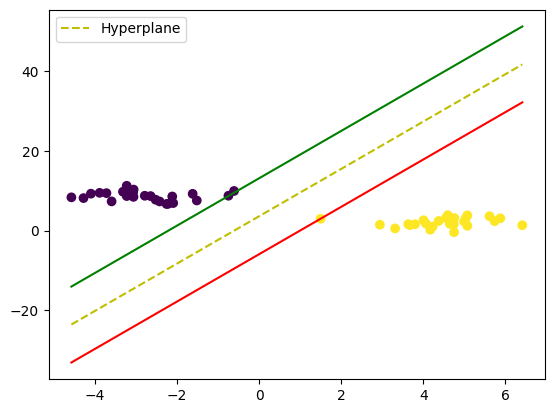

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # 確保標籤為 -1 或 1

        # 權重與偏置初始化
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

    def visualize(self, X, y):
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

        # 畫出超平面
        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, self.w, self.b, 0)
        x1_2 = get_hyperplane_value(x0_2, self.w, self.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, self.w, self.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, self.w, self.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, self.w, self.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, self.w, self.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--', label="Hyperplane")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'g')
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'r')

        plt.legend()
        plt.show()


# 測試資料
if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.2, random_state=42)
    y = np.where(y == 0, -1, 1)

    model = SVM()
    model.fit(X, y)

    predictions = model.predict(X)
    acc = np.mean(predictions == y)
    print(f"準確率: {acc * 100:.2f}%")
    print(f"權重 w: {model.w}, 偏置 b: {model.b}")

    model.visualize(X, y)